<a href="https://colab.research.google.com/github/eniacker/Visualizaci-n-Actividades-Guiadas/blob/master/Visualizaci%C3%B3n_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Andrés Felipe Torres
>
Url: https://viu-visual-andrestorres.stackblitz.io

In [4]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [5]:
#Cargamos el data set de los pasajeros del Titanic
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [6]:
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [8]:
#Renombra la columna class=clase y fare=tarifa
titanic.rename(columns={'class': 'clase'},
inplace=True)
titanic.rename(columns={'fare': 'tarifa'},
inplace=True)
#Muestra los valores distintos para class(clase)
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [9]:
#Añadimos nuevas columnas: is_old, is_baby
def is_old_func(row):
  return row['age'] > 60
  
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

In [10]:
#Consulta con condiciones
titanic[
(titanic.sex == 'female')
& (titanic['clase'].isin(['First',
'Third']))
& (titanic.age > 45 )
& (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False


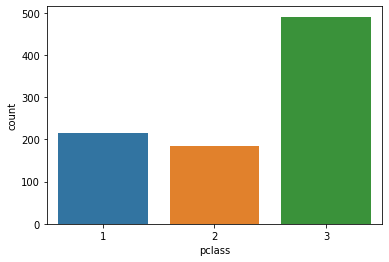

In [ ]:
#Distribución de las clases
sns.countplot(x="pclass", data=titanic)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


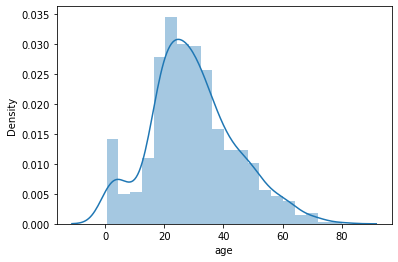

In [ ]:
#Distribución de la edad(ege)
sns.distplot(titanic.age.dropna( ))
plt.show( )

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


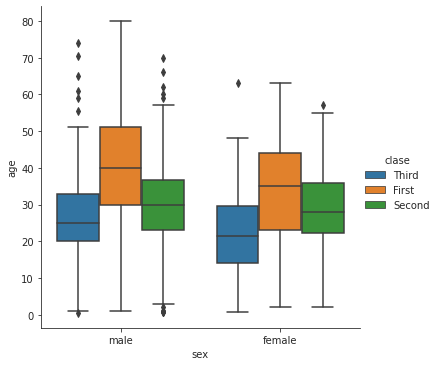

In [ ]:
#BoxPlot de la edad por sexo y clase

with sns.axes_style(style='ticks'):ax = sns.catplot("sex", "age", "clase" , data=titanic, kind="box")


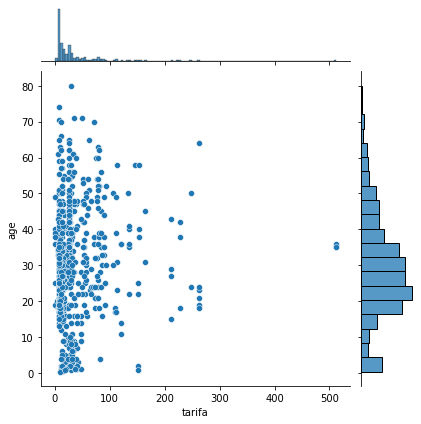

In [ ]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='tarifa',y='age',data=titanic)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

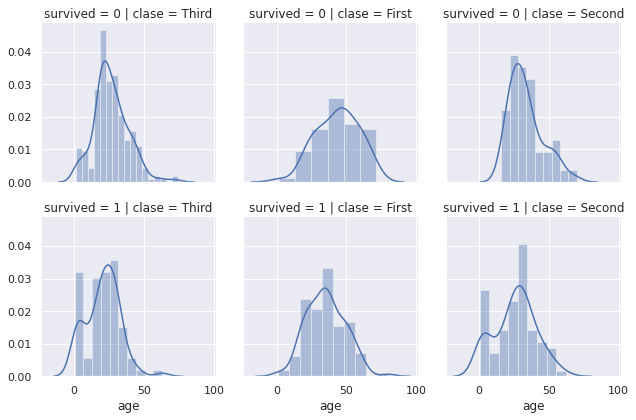

In [ ]:
#Distribución de la edad según la categorías: survived, clase
sns.set(font_scale=1)
g = sns.FacetGrid(titanic, row='survived',
col='clase')
g.map(sns.distplot, "age")
plt.show()

Text(0.5, 1.0, 'titanic.corr()')

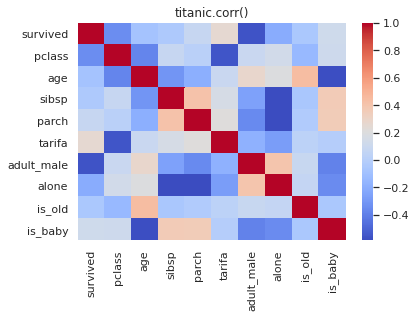

In [ ]:
# Mapa de calor de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

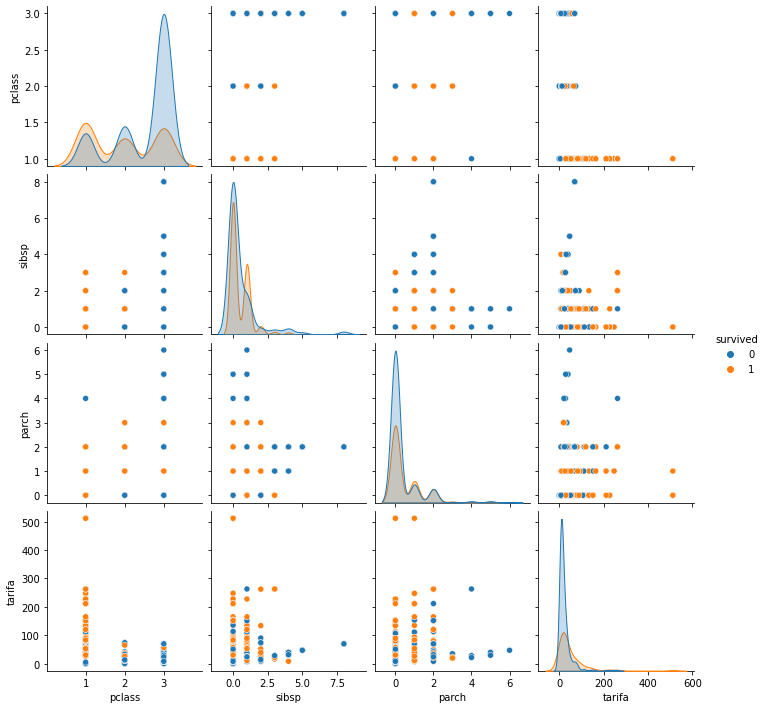

In [13]:
#Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]
#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

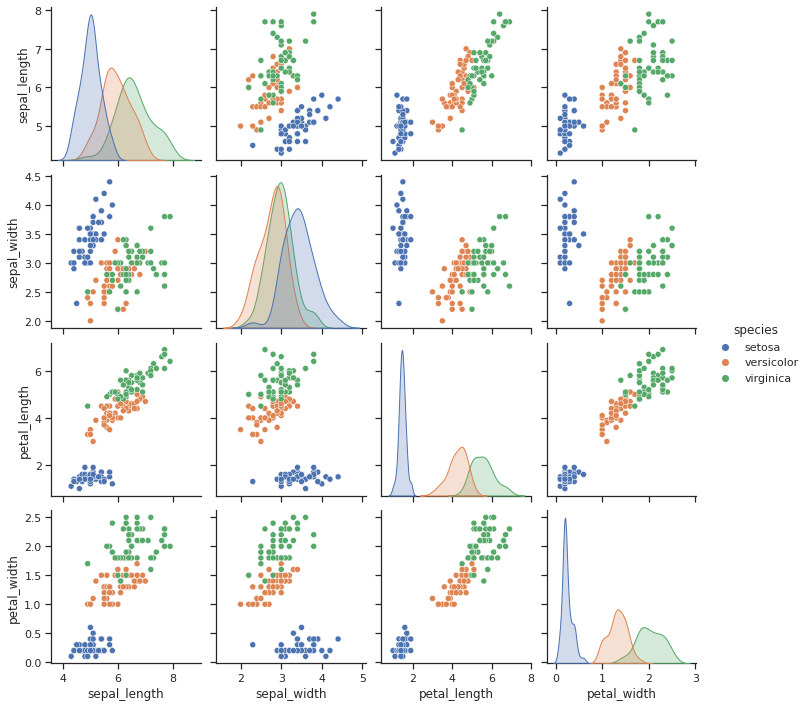

In [14]:
#Establece el estilo estético de las tramas
sns.set(style="ticks")
#Carga el data set
df = sns.load_dataset("iris")
#matriz de diagramas de dispersion
sns.pairplot(df, hue="species")